<div style="width: 100%; background-color: #222; text-align: center">
<br><br>


    
<h1 style="color: #ef7d22; font-weight: normal;">
    Diabetes analysis
</h1>

<br><br> 
</div>

![orange-divider](https://user-images.githubusercontent.com/7065401/98619088-44ab6000-22e1-11eb-8f6d-5532e68ab274.png)


The goal of this project is to create a model that predicts whether a person has diabetes, based on patient information such as blood pressure, body mass index (BMI), age, etc.

We will use [Diabetes dataset](https://www.kaggle.com/uciml/pima-indians-diabetes-database), which have 8 numeric features plus a 0-1 class label.

1. Number of times pregnant 
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
3. Diastolic blood pressure (mm Hg) 
4. Triceps skin fold thickness (mm) 
5. 2-Hour serum insulin (mu U/ml) 
6. Body mass index (weight in kg/(height in m)^2) 
7. Diabetes pedigree function 
8. Age (years) 
9. Class variable (0:No or 1:Yes) 




Import `pandas`, `numpy` and `matplotlib` libraries.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline



### Load the `data/diabetes.csv` file, and store it into `diabetes_df` dataframe.

In [3]:
diabetes_df = pd.read_csv('diabetes.csv', sep=';')
diabetes_df.head()

,numPregnant,glucose,bloodPress,skinThick,insulin,massIndex,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Show the shape of the resulting `diabetes_df`.

In [4]:
diabetes_df.shape

(768, 9)



### Data exploration, visualization and relationships

Let's first see some descriptive statistics of the data:

In [6]:
diabetes_df.describe()

,numPregnant,glucose,bloodPress,skinThick,insulin,massIndex,pedigree,age,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Provide the information about the data types,columns, null value counts, memory usage etc

In [7]:
diabetes_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   numPregnant  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   bloodPress   768 non-null    int64  
 3   skinThick    768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   massIndex    768 non-null    float64
 6   pedigree     768 non-null    float64
 7   age          768 non-null    int64  
 8   label        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Show the distribution of target values (labels) in the diabetes dataframe

In [30]:
diabetes_df['label'].value_counts()

label
0    475
1    249
Name: count, dtype: int64

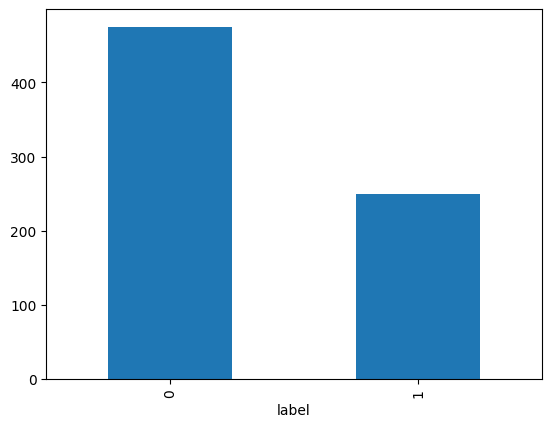

In [36]:
diabetes_df['label'].value_counts().plot(kind='bar');

Show the count of zeros per column 

In [8]:
diabetes_df.isin([0]).sum()

numPregnant    111
glucose          5
bloodPress      35
skinThick      227
insulin        374
massIndex       11
pedigree         0
age              0
label          500
dtype: int64

We will remove observations for patients with blood pressure, glucose, or body mass index equal to 0, as these values are clinically nonsensical and do not represent valid health measurements. Retaining these observations could lead to misleading conclusions in our analysis.



### Remove wrong observations

Remove patients with `bloodPress`, `glucose` or `massIndex` equal to `0`.

In [9]:
diabetes_df = diabetes_df.loc[diabetes_df['bloodPress'] > 0,:]
diabetes_df = diabetes_df.loc[diabetes_df['glucose'] > 0 , :]
diabetes_df = diabetes_df.loc[diabetes_df['massIndex'] > 0 , :]


In [10]:
diabetes_df

,numPregnant,glucose,bloodPress,skinThick,insulin,massIndex,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Let's see again the descriptive statistics of the data:

In [11]:
diabetes_df.describe()

,numPregnant,glucose,bloodPress,skinThick,insulin,massIndex,pedigree,age,label
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,3.866022,121.882597,72.400552,21.443370,84.494475,32.467127,0.474765,33.350829,0.343923
std,3.362803,30.750030,12.379870,15.732756,117.016513,6.888941,0.332315,11.765393,0.475344
min,0.000000,44.000000,24.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,0.000000,27.500000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,24.000000,48.000000,32.400000,0.379000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,130.500000,36.600000,0.627500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000




### Plot a `scatter_matrix` showing `age`, `glucose` and `massIndex` relationships



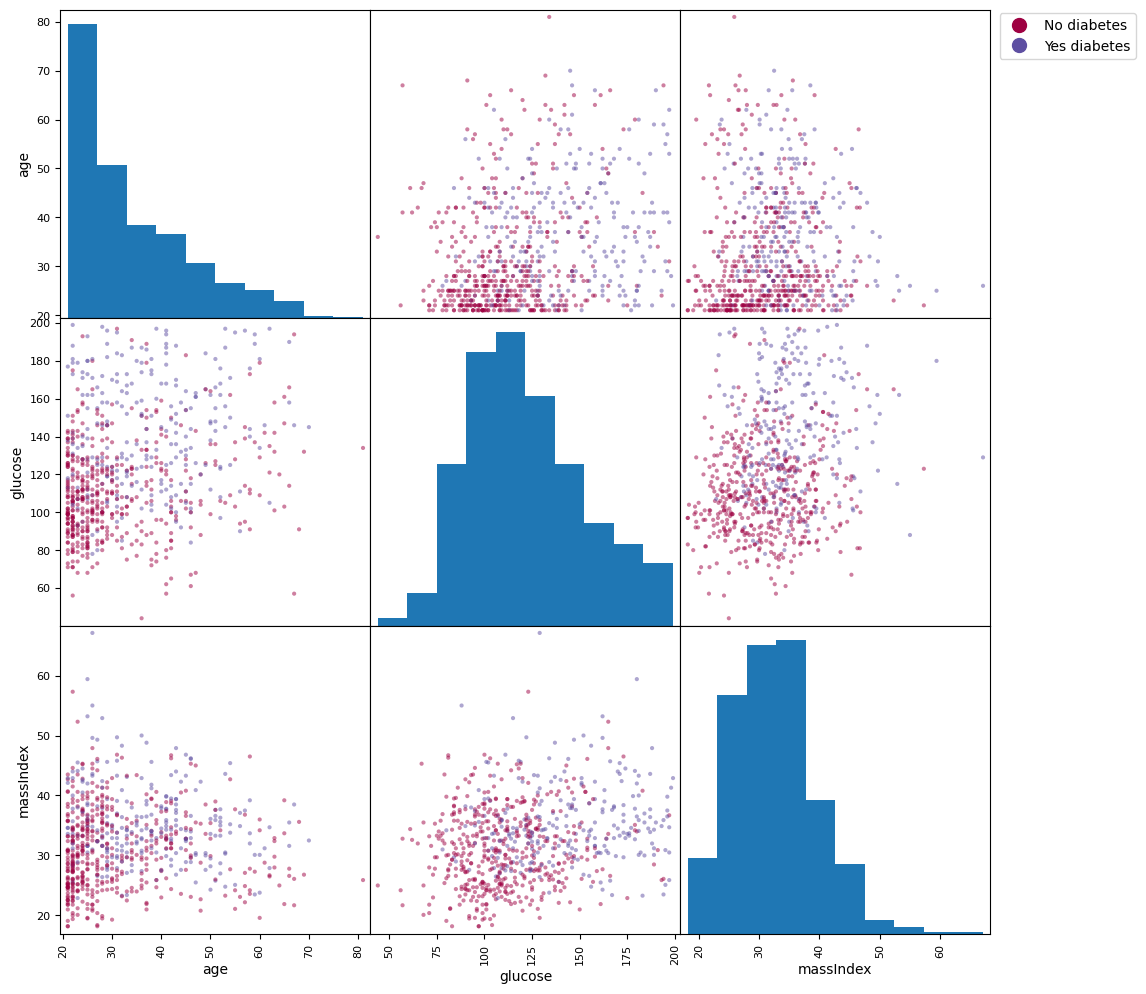

In [12]:
from pandas.plotting import scatter_matrix

ax = scatter_matrix(diabetes_df[['age', 'glucose', 'massIndex']],
                    c=diabetes_df['label'],
                    cmap=plt.cm.Spectral,
                    figsize=(12,12))

plt.legend([plt.plot([],[],color=plt.get_cmap('Spectral')(i/1.),
                     ls='', marker='o', markersize=10)[0] for i in range(2)],
           ['No diabetes', 'Yes diabetes'],
           loc=(1.03, 2.84));



### Let's see correlation matrix for all the variables

Which variables are positively and negatively correlated? Make an analysis of the correlation matrix.

In [13]:
corr_metrics = diabetes_df.corr()
corr_metrics

,numPregnant,glucose,bloodPress,skinThick,insulin,massIndex,pedigree,age,label
numPregnant,1.000000,0.134915,0.209668,-0.095683,-0.080059,0.012342,-0.025996,0.557066,0.224417
glucose,0.134915,1.000000,0.223331,0.074381,0.337896,0.223276,0.136630,0.263560,0.488384
bloodPress,0.209668,0.223331,1.000000,0.011777,-0.046856,0.287403,-0.000075,0.324897,0.166703
skinThick,-0.095683,0.074381,0.011777,1.000000,0.420874,0.401528,0.176253,-0.128908,0.092030
insulin,-0.080059,0.337896,-0.046856,0.420874,1.000000,0.191831,0.182656,-0.049412,0.145488
massIndex,0.012342,0.223276,0.287403,0.401528,0.191831,1.000000,0.154858,0.020835,0.299375
pedigree,-0.025996,0.136630,-0.000075,0.176253,0.182656,0.154858,1.000000,0.023098,0.184947
age,0.557066,0.263560,0.324897,-0.128908,-0.049412,0.020835,0.023098,1.000000,0.245741
label,0.224417,0.488384,0.166703,0.092030,0.145488,0.299375,0.184947,0.245741,1.000000


In [14]:
corr_metrics = diabetes_df.corr()
corr_metrics.style.background_gradient(cmap="bwr")

,numPregnant,glucose,bloodPress,skinThick,insulin,massIndex,pedigree,age,label
numPregnant,1.000000,0.134915,0.209668,-0.095683,-0.080059,0.012342,-0.025996,0.557066,0.224417
glucose,0.134915,1.000000,0.223331,0.074381,0.337896,0.223276,0.136630,0.263560,0.488384
bloodPress,0.209668,0.223331,1.000000,0.011777,-0.046856,0.287403,-0.000075,0.324897,0.166703
skinThick,-0.095683,0.074381,0.011777,1.000000,0.420874,0.401528,0.176253,-0.128908,0.092030
insulin,-0.080059,0.337896,-0.046856,0.420874,1.000000,0.191831,0.182656,-0.049412,0.145488
massIndex,0.012342,0.223276,0.287403,0.401528,0.191831,1.000000,0.154858,0.020835,0.299375
pedigree,-0.025996,0.136630,-0.000075,0.176253,0.182656,0.154858,1.000000,0.023098,0.184947
age,0.557066,0.263560,0.324897,-0.128908,-0.049412,0.020835,0.023098,1.000000,0.245741
label,0.224417,0.488384,0.166703,0.092030,0.145488,0.299375,0.184947,0.245741,1.000000


`age` and `numPregnant` variables have high correlation, which makes sense.



### Create features $X$ and labels $y$

In [15]:
X = diabetes_df.drop('label', axis=1)
y = diabetes_df['label']

In [16]:
X

,numPregnant,glucose,bloodPress,skinThick,insulin,massIndex,pedigree,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [17]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: label, Length: 724, dtype: int64

![orange-divider](https://user-images.githubusercontent.com/7065401/98619088-44ab6000-22e1-11eb-8f6d-5532e68ab274.png)

### Split the dataset

Test set should have 20% of the observations.

In [18]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)


In [19]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((579, 8), (145, 8), (579,), (145,))

In [20]:
X_train

,numPregnant,glucose,bloodPress,skinThick,insulin,massIndex,pedigree,age
25,10,125,70,26,115,31.1,0.205,41
410,6,102,90,39,0,35.7,0.674,28
576,6,108,44,20,130,24.0,0.813,35
616,6,117,96,0,0,28.7,0.157,30
192,7,159,66,0,0,30.4,0.383,36
...,...,...,...,...,...,...,...,...
393,4,116,72,12,87,22.1,0.463,37
339,7,178,84,0,0,39.9,0.331,41
562,1,87,68,34,77,37.6,0.401,24
133,8,84,74,31,0,38.3,0.457,39


In [21]:
y_train

25     1
410    0
576    0
616    0
192    1
      ..
393    0
339    1
562    0
133    0
281    0
Name: label, Length: 579, dtype: int64



### Standardize the features

Use the `StandardScaler` to standardize the features (`X_train` and `X_test`) before moving to model creation.

In [22]:
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()

Scaler.fit(X_train)

array([[ 1.87195136,  0.09402706, -0.1855456 , ..., -0.20566429,
        -0.80726664,  0.65873716],
       [ 0.66799708, -0.65801999,  1.39898099, ...,  0.45042179,
         0.59246942, -0.45224527],
       [ 0.66799708, -0.4618338 , -2.24543016, ..., -1.21831888,
         1.00731656,  0.14597604],
       ...,
       [-0.83694576, -1.14848546, -0.34399826, ...,  0.72141386,
        -0.22230232, -0.79408602],
       [ 1.26997422, -1.24657855,  0.13135972, ...,  0.82125305,
        -0.05516966,  0.48781678],
       [ 1.87195136,  0.22481785,  0.28981238, ...,  0.47894727,
        -0.58342825,  0.48781678]])

In [23]:
X_train = Scaler.transform(X_train)
X_test = Scaler.transform(X_test)

In [24]:
X_train

array([[ 1.87195136,  0.09402706, -0.1855456 , ..., -0.20566429,
        -0.80726664,  0.65873716],
       [ 0.66799708, -0.65801999,  1.39898099, ...,  0.45042179,
         0.59246942, -0.45224527],
       [ 0.66799708, -0.4618338 , -2.24543016, ..., -1.21831888,
         1.00731656,  0.14597604],
       ...,
       [-0.83694576, -1.14848546, -0.34399826, ...,  0.72141386,
        -0.22230232, -0.79408602],
       [ 1.26997422, -1.24657855,  0.13135972, ...,  0.82125305,
        -0.05516966,  0.48781678],
       [ 1.87195136,  0.22481785,  0.28981238, ...,  0.47894727,
        -0.58342825,  0.48781678]])

In [25]:
X_test

array([[-0.23496862, -1.08309006,  0.13135972, ..., -0.30550347,
         0.22537446,  0.4023566 ],
       [-0.83694576, -0.42913611, -1.13626155, ..., -0.57649555,
        -0.76548348, -0.96500639],
       [-0.83694576, -0.82150848, -0.34399826, ..., -0.76191118,
         1.84894891, -0.96500639],
       ...,
       [-0.83694576,  0.68258562,  1.08207567, ..., -0.34829169,
         1.243093  , -0.87954621],
       [-0.23496862,  2.31747051, -0.1855456 , ...,  0.33631986,
        -0.69982421, -0.70862583],
       [ 1.57096279,  0.74798102,  1.24052833, ..., -0.31976621,
         0.88196707,  1.6842594 ]])


### Build and fit a k-nearest neighbors classifier

Use `4` neighbors.

For training use `X_train` and `y_train`.

In [26]:
from sklearn.neighbors import KNeighborsClassifier

k = 4
model = KNeighborsClassifier(n_neighbors=k)

model.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=4)



### Evaluating the model

Now use your model to get the predictions for the `X_test` set:

In [27]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

Get the `Accuracy` of your prediction:

In [28]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7379310344827587

Finally, create a full model report using `classification_report` method:

In [29]:
from sklearn.metrics import classification_report

model_report = classification_report(y_test, y_pred)
print('Model report: \n', model_report)

Model report: 
               precision    recall  f1-score   support

           0       0.76      0.89      0.82        97
           1       0.66      0.44      0.53        48

    accuracy                           0.74       145
   macro avg       0.71      0.66      0.67       145
weighted avg       0.73      0.74      0.72       145



- The model performs better on class 0 (non-diabetic individuals) in terms of both precision and recall, but struggles more with class 1 (diabetic individuals), which is reflected in the lower recall and precision for class.


- The model has an accuracy of 74%, but this number doesn't fully reflect the imbalance in the class distributions.